In [1]:
using Measurements
using Plots
using Dates
using PlutoUI
using Chain
using DataFrames
using DataFramesMeta
using StatsFuns
using Interact
    
 module data include("./src/data.jl") end
 module bs include("./src/blackschole.jl") end
 

WebIO._IJuliaInit()

Main.bs

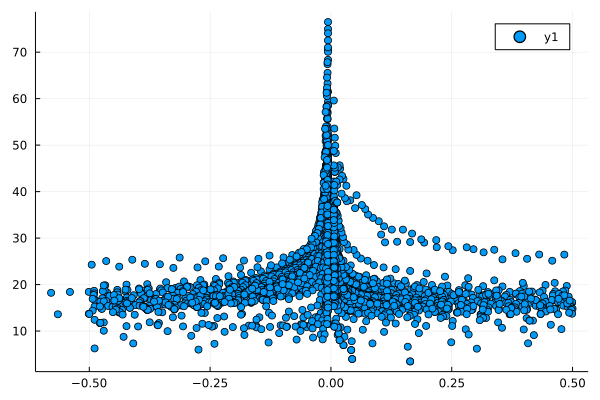

In [2]:
df = @chain data.getAllData() (
    data.outOfMoneyOptions!();
	data.ff(:delta => x -> .005 < abs(x) );   ## remove way out of money quotes
	transform([:strikePrice, :gamma] => ((s,g) -> .5 * .01  .* g .* s .^2) => :dollarGamma);
	)
        
plot(df.delta, df.vol, st=:scatter)

In [ ]:
opt =1 * bs.butterfly("AMZN", 3380.,3400.,3450., Date("2021-10-15"), bs.CALL) -3 * bs.vertical("AMZN",3400.,3450., Date("2021-10-15"), bs.CALL)

opt=2*bs.call("AMZN", 3400., Date("2021-10-15") ) - 1*bs.call("AMZN", 3450., Date("2021-10-15") )


Main.bs.opContract(Tuple{Int64, Main.bs.Option}[(1, Main.bs.Option{String}(Main.bs.CALL, "AMZN", Date("2021-10-15"), 3400.0, "OPTSYM-TBD")) (-1, Main.bs.Option{String}(Main.bs.CALL, "AMZN", Date("2021-10-15"), 3450.0, "OPTSYM-TBD"))])

In [2]:
@manipulate for vol=.1:01:.7, volrange=.1:.01:.3

    t=.5
    spot=3400
    v = measurement(vol, volrange)
    t, v, spot


    p1=plot([(s, bs.dollarGamma(opt, s, v,t)) for s in 3100.:10.:3700], label="", size=(500,400), title="dollargamma")
    p1=plot!([spot], st=:vline, size=(500,400), label="")

    p2=plot([(s, bs.greeks(opt, s, v,t)[1]) for s in 3100.:10.:3700],label="", color=:black, lw=2, size=(500,400), title="mark")
    plot!(p2, [spot], st=:vline, size=(500,400), label="")

    dg=bs.dollarGamma(opt, spot, v,t)
    # the dollar gamma pl for the returns
    p3=plot([((1+r)*spot, 50*dg*r^2) for r in -.05:.003:.05], label="", title="Dollar Gamma PL", size=(500,400))


    plot(p1,p2, p3)
end


LoadError: Invalid dependency (must be a url, file, or AssetRegistry path): /home/daryoush/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js